# Tidal Gauge comparison

In [92]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
import os
import numpy as np
import netCDF4 as nc
import xarray as xr
import datatree as dt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from sithom.plot import plot_defaults, label_subplots, lim
from tcpips.constants import DATA_PATH, FIGURE_PATH
from adforce.mesh import xr_loader
plot_defaults()

In [94]:
from adforce.mesh import bbox_mesh

In [95]:
fm = bbox_mesh()

'xr_loader'  0.02006 s 

'filter_mesh'  0.02582 s 

'bbox_mesh'  0.04725 s 



In [96]:
ls

comp.ipynb  f22.ipynb  f63.ipynb  mesh.ipynb  README.md  tides.ipynb


In [97]:
fm

<xarray.Dataset>
Dimensions:      (time: 1008, node: 1899, mesh: 1, nope: 1, neta: 103,
                  nbou: 59, nvel: 4514, nele: 3205, nvertex: 3)
Coordinates:
  * time         (time) datetime64[ns] 2014-04-29T00:10:00 ... 2014-05-06
    x            (node) float64 -91.45 -91.21 -91.66 ... -87.42 -87.42 -87.43
    y            (node) float64 28.61 28.63 28.61 28.61 ... 30.47 30.48 30.48
Dimensions without coordinates: node, mesh, nope, neta, nbou, nvel, nele,
                                nvertex
Data variables:
    adcirc_mesh  (mesh) int32 ...
    nvdll        (nope) int32 ...
    max_nvdll    int32 ...
    ibtypee      (nope) int32 ...
    nbdv         (neta) int32 ...
    nvell        (nbou) int32 ...
    max_nvell    int32 ...
    ibtype       (nbou) int32 ...
    nbvv         (nvel) int32 ...
    depth        (node) float64 ...
    zeta         (time, node) float64 ...
    element      (nele, nvertex) int64 17 26 44 18 45 ... 1092 1091 994 1092 993
Attributes: (12/49)
    _FillValue:         -99999.0
    model:              ADCIRC
    version:            022ef7c
    grid_type:          Triangular
    description:        ADCIRC Example     ! 32 CHARACTER ALPHANUMERIC RUN DE...
    agrid:              eastcoast_95d_ll_select.grd
    ...                 ...
    sfea0:              29.000000000000004
    cf:                 0.0
    eslm:               50.0
    cori:               0.0
    ntif:               8
    nbfr:               8

In [98]:
from adforce.mesh import select_edge_indices

In [99]:
from src.constants import NEW_ORLEANS

In [100]:
indices = select_edge_indices(fm, NEW_ORLEANS.lon, NEW_ORLEANS.lat, number=10, verbose=True)
indices

'calculate_adjacency_matrix'  0.00089 s 

'select_coast_indices'  0.00265 s 

Central point -90.0715 29.9511
Distances [ -3.69664923  -3.04899336  -4.32351515  -2.6400883   -4.91054106
  -5.15769535  -2.17386012  -1.93877288  -2.38480176  -4.51108515
  -2.37676632  -1.9750201   -1.83584521  -1.75480189  -2.49345066
  -3.81245686  -2.98824968  -6.25466304  -4.33373212  -4.93257209
  -4.26160809  -7.25354453 -10.63430103  -8.92765166  -4.01114651
  -4.2309873  -13.95979926 -12.19779642  -3.94981997 -14.10162675
  -1.36334337  -1.63907512  -3.7417047  -13.23688595 -12.17127591
  -1.78275235  -1.13031754  -1.18660004  -1.43061056  -0.83496492
  -3.76684165  -0.64443576  -0.62512274 -12.63927409  -1.9668811
  -0.71282472  -3.10899212  -3.45336185  -3.7442178   -1.4865134
  -1.43847735  -1.38040871  -0.58785673  -0.53103203  -1.63266992
  -1.76956949  -1.75720496  -1.67498743  -1.64859938 -12.45920749
  -1.71028059  -1.60876049  -1.76360474  -1.97389774  -0.50863064
  -1.42021215  -1.3359663

array([501, 500, 491, 490, 473,  93, 489, 459,  94, 474])

In [101]:
NEW_ORLEANS.lon, NEW_ORLEANS.lat

(-90.0715, 29.9511)

In [102]:
x = NEW_ORLEANS.lon
y = NEW_ORLEANS.lat

In [103]:
xs = fm.x.values
xs

array([-91.445702, -91.21136 , -91.661757, ..., -87.420708, -87.417966,
       -87.426192])

In [104]:
ys = fm.y.values
ys

array([28.6064  , 28.628333, 28.611474, ..., 30.471359, 30.482307,
       30.479228])

In [105]:
ys-y

array([-1.3447  , -1.322767, -1.339626, ...,  0.520259,  0.531207,
        0.528128])

In [106]:
xs-x

array([-1.374202, -1.13986 , -1.590257, ...,  2.650792,  2.653534,
        2.645308])

In [107]:
sqd = (xs-x)**2 + (ys-y)**2
sqd

array([3.69664923, 3.04899336, 4.32351515, ..., 7.29736765, 7.32342357,
       7.2765736 ])

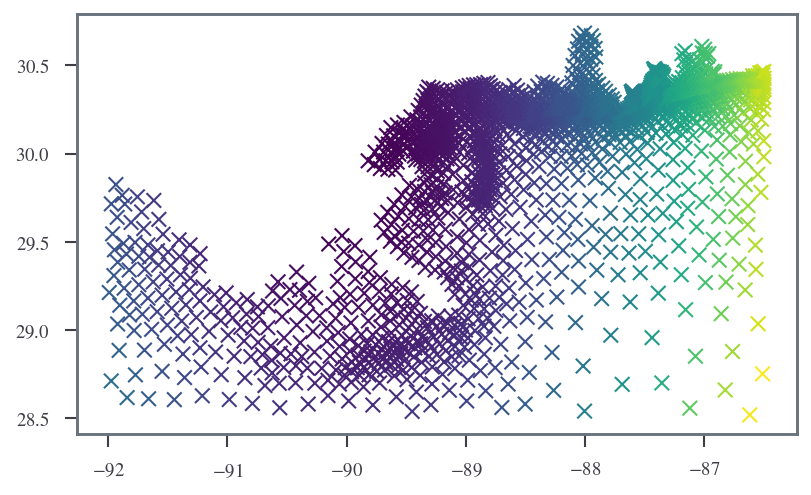

In [108]:
plt.scatter(xs, ys, c=sqd, marker="x")

In [109]:
def plot(ds):
    plt.triplot(ds.x.values, ds.y.values, ds.element.values -1)

Text(0.5, 0, 'Longitude [$^\\circ$E]')

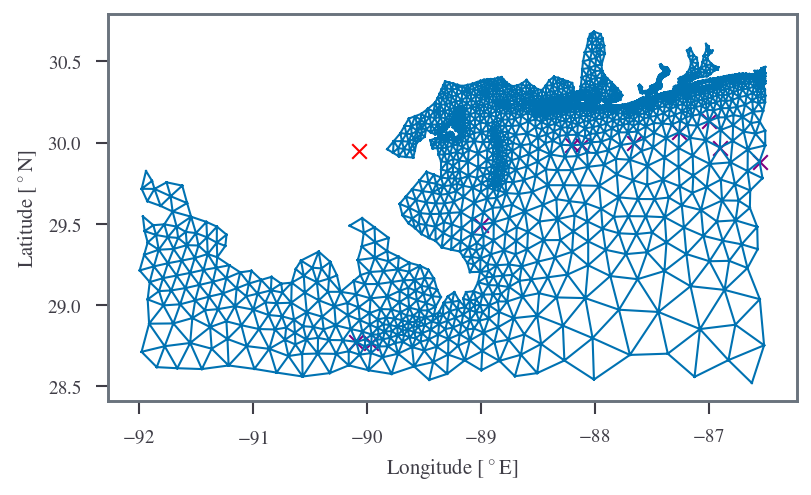

In [110]:
plot(fm)
cc = fm.isel(node=indices)
plt.scatter(NEW_ORLEANS.lon, NEW_ORLEANS.lat, marker="x", color="red")
plt.scatter(cc.x, cc.y, marker="x", color="purple")
plt.ylabel("Latitude [$^\circ$N]")
plt.xlabel("Longitude [$^\circ$E]")

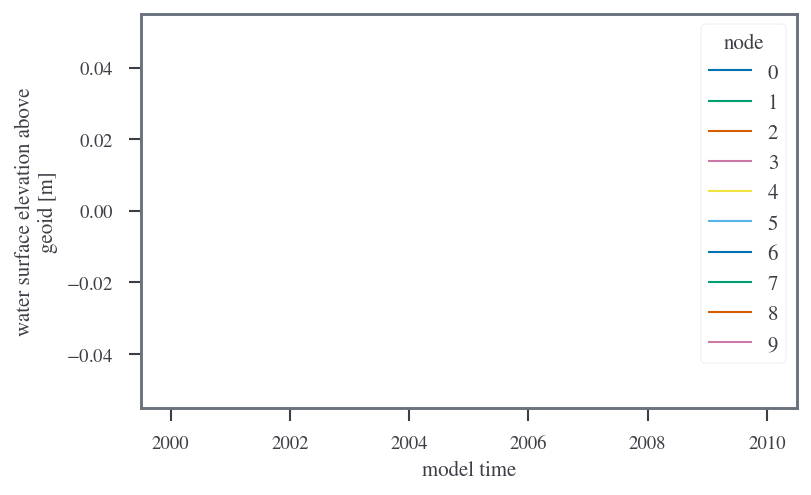

In [111]:
cc.zeta.plot.line(x="time")

In [112]:
cc.zeta.values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [113]:
fm.isel(time=0).zeta.values

array([nan, nan, nan, ..., nan, nan, nan])

In [114]:
from adforce.mesh import xr_loader

In [115]:
f63 = xr_loader("../data/fort.63.nc")

'xr_loader'  0.09152 s 



In [116]:
f63.isel(time=0).zeta.values

array([nan, nan, nan, ..., nan, nan, nan])

In [117]:
f63 = xr_loader("../../kat2/fort.63.nc")

'xr_loader'  0.04232 s 



In [118]:
f63.isel(time=0).zeta.values

array([0.15454534, 0.14562978, 0.14911029, ...,        nan,        nan,
              nan])

In [119]:
new_indices = select_edge_indices(f63, NEW_ORLEANS.lon, NEW_ORLEANS.lat, number=10, verbose=True)

'calculate_adjacency_matrix'  1.68350 s 

'select_coast_indices'  4.21036 s 

Central point -90.0715 29.9511
Distances [-62.04526771 -62.19355844 -62.45160924 ...  -3.30582351  -0.43331737
  -3.30512049]
'select_edge_indices'  5.21877 s 



In [120]:
f63.isel(node=new_indices).zeta

<xarray.DataArray 'zeta' (time: 75, node: 10)>
[750 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2005-08-23T19:00:00 ... 2005-08-30T12:00:00
    x        (node) float64 ...
    y        (node) float64 ...
Dimensions without coordinates: node
Attributes:
    long_name:      water surface elevation above geoid
    standard_name:  sea_surface_height_above_geoid
    location:       node
    mesh:           adcirc_mesh
    units:          m

In [121]:
f63 = xr_loader("../../NWS13ex/fort.63.nc")

'xr_loader'  0.08016 s 



In [122]:
new_indices = select_edge_indices(f63, NEW_ORLEANS.lon, NEW_ORLEANS.lat, number=10, verbose=True)
cc_new = f63.isel(node=new_indices).zeta

'calculate_adjacency_matrix'  0.15409 s 

'select_coast_indices'  0.29521 s 

Central point -90.0715 29.9511
Distances [-158.56678837 -156.35666306 -159.09196148 ... -940.1239231  -941.73877373
 -945.18863142]
'select_edge_indices'  0.82433 s 



In [123]:
cc_new

<xarray.DataArray 'zeta' (time: 0, node: 10)>
[0 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 
    x        (node) float64 ...
    y        (node) float64 ...
Dimensions without coordinates: node
Attributes:
    long_name:      water surface elevation above geoid
    standard_name:  sea_surface_height_above_geoid
    location:       node
    mesh:           adcirc_mesh
    units:          m

In [124]:
def test_file(file):
    f63 = xr_loader(file)
    new_indices = select_edge_indices(f63, NEW_ORLEANS.lon, NEW_ORLEANS.lat, number=10, verbose=True)
    cc_new = f63.isel(node=new_indices).zeta
    return cc_new

In [125]:
ex_work = test_file("../../NWS13example/fort.63.nc")

'xr_loader'  0.13715 s 

'calculate_adjacency_matrix'  0.16583 s 

'select_coast_indices'  0.52696 s 

Central point -90.0715 29.9511
Distances [-158.56678837 -156.35666306 -159.09196148 ... -940.1239231  -941.73877373
 -945.18863142]
'select_edge_indices'  1.14713 s 



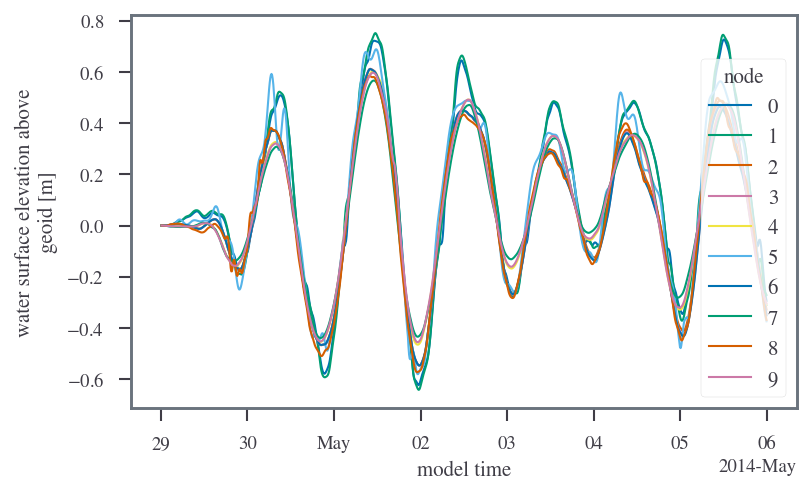

In [126]:
ex_work.plot.line(x="time")

In [127]:
set4 = test_file("../../NWS13set4/fort.63.nc")

'xr_loader'  0.02574 s 

'calculate_adjacency_matrix'  0.33576 s 

'select_coast_indices'  0.60856 s 

Central point -90.0715 29.9511
Distances [-158.56678837 -156.35666306 -159.09196148 ... -940.1239231  -941.73877373
 -945.18863142]
'select_edge_indices'  1.10524 s 



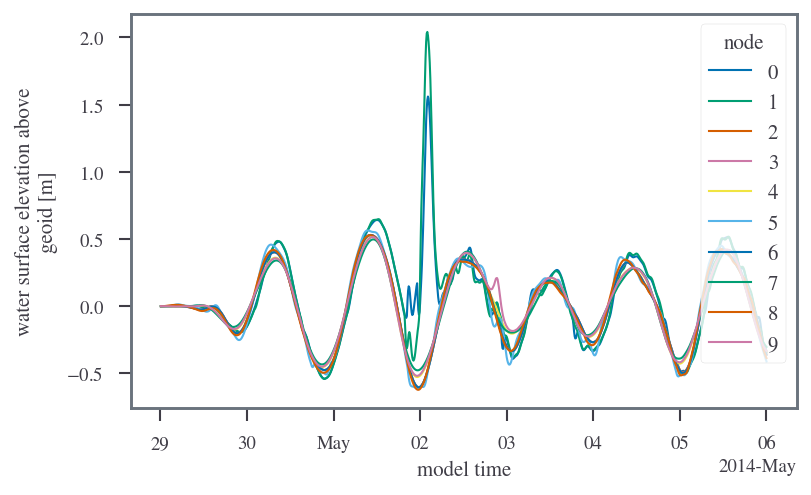

In [128]:
set4.plot.line(x="time")

'xr_loader'  0.09515 s 

'filter_mesh'  0.02361 s 

'bbox_mesh'  0.12134 s 

'xr_loader'  0.09344 s 

'filter_mesh'  0.02977 s 

'bbox_mesh'  0.13129 s 

'calculate_adjacency_matrix'  0.00151 s 

'select_coast_indices'  0.00474 s 

Central point -90.0715 29.9511
Distances [-19.98431332 -21.4615318  -15.41399895 -16.8468542  -13.99190961
 -12.82349374 -11.93532087 -23.30345669 -11.26400112 -11.36712331
 -11.46317248 -11.88589203 -22.07591016 -13.06412712 -11.34297885
 -21.17272671 -18.10490342 -12.68345467 -17.44597552 -16.76092366
 -14.02094679 -18.48917894 -16.82723502 -25.23404459 -21.52780771
 -19.19868502 -16.37057667 -27.5390994  -16.04882264 -30.15906882
 -16.69298245 -37.08145838 -33.11445661 -15.48004964 -40.25553171
 -16.02075064 -39.58165179 -35.76496762 -15.75132511 -35.35565528
 -15.57880843 -33.5165734  -32.4109475  -15.38661899  -1.36334337
  -1.63907512 -33.34251055 -31.2605435  -15.32451277  -1.78275235
  -1.13031754  -1.18660004  -1.43061056  -0.83496492  -4.94583264
 

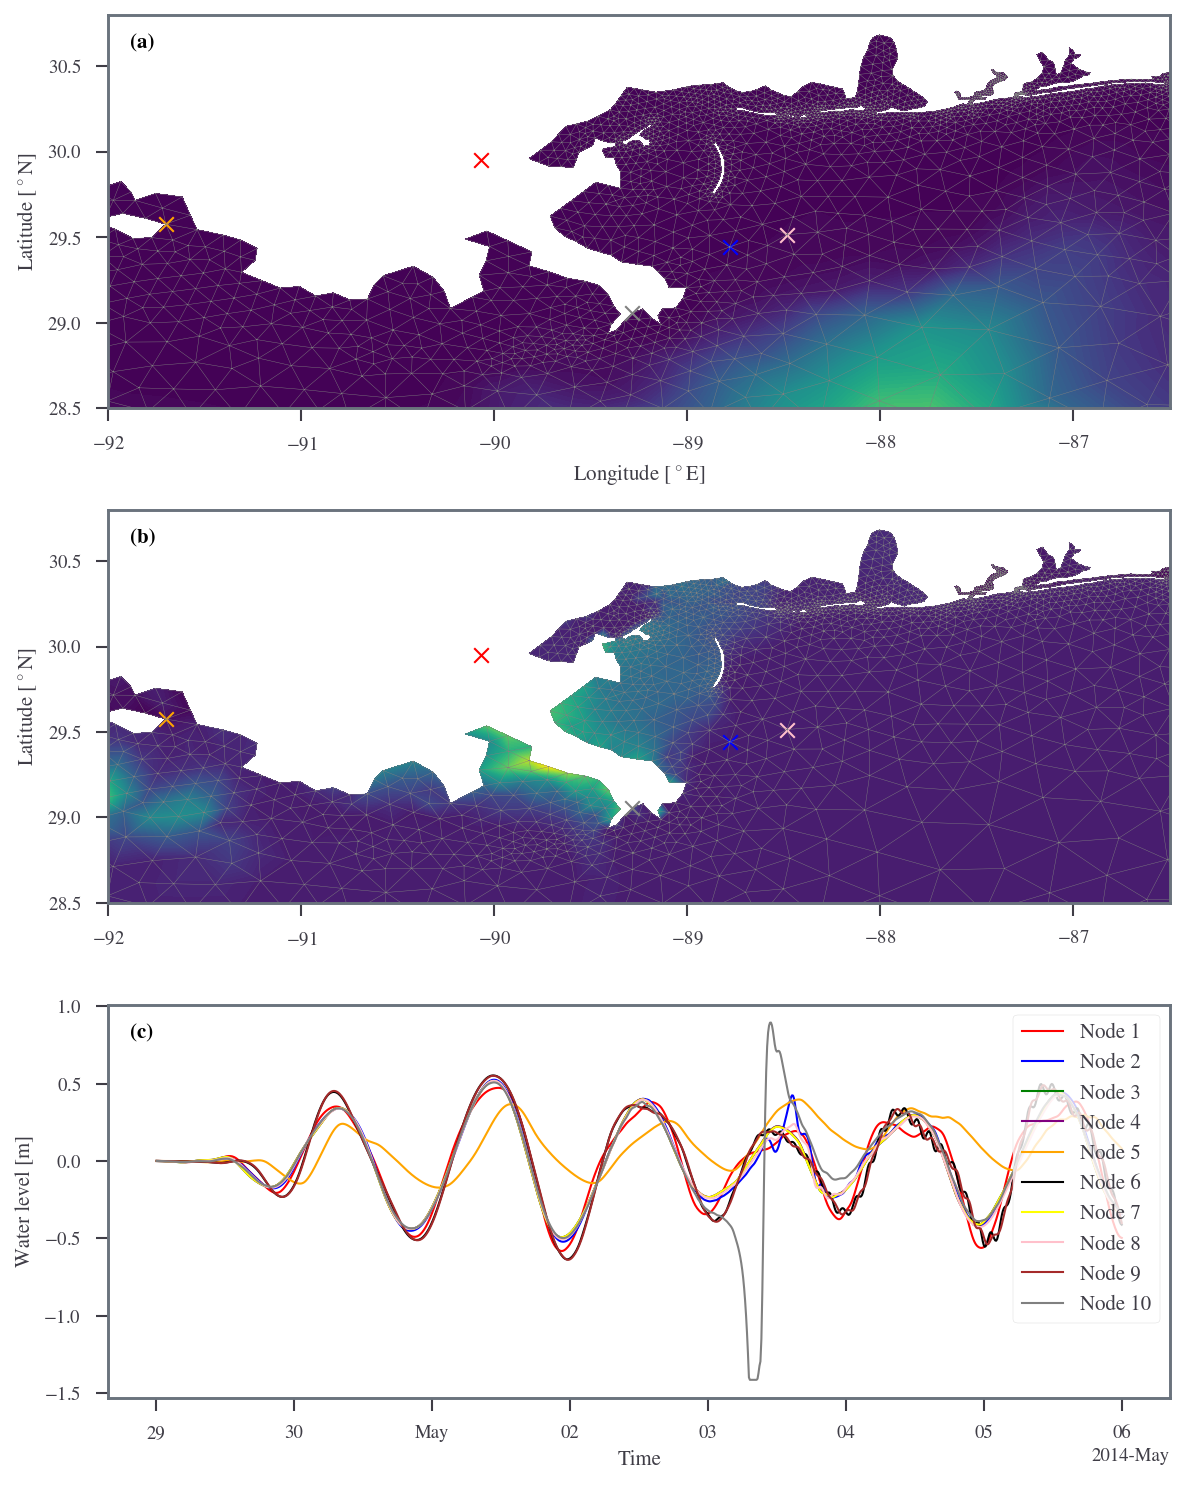

In [129]:

import numpy as np
from sithom.place import BoundingBox, Point
from src.constants import NO_BBOX, NEW_ORLEANS
from sithom.time import timeit

@timeit
def plot_nearby(data_folder: str = "../../NWS13set4/", bbox: BoundingBox =  NO_BBOX, point: Point = NEW_ORLEANS, number: int=10, pad: float = 2, plot_mesh: bool = True, overtopping=False):
    maxele_ds = bbox_mesh(os.path.join(data_folder, "maxele.63.nc"), bbox=bbox.pad(pad))
    timeseries_ds = bbox_mesh(os.path.join(data_folder, "fort.63.nc"), bbox=bbox.pad(pad))
    new_indices = select_edge_indices(timeseries_ds, point.lon, point.lat, number=number, verbose=True, overtopping=overtopping)
    coastal_zeta_da = timeseries_ds.isel(node=new_indices).zeta

    fig, axs = plt.subplots(3, 1, figsize=(8, 10))

    #axs[0].tricontourf(maxele_ds.x.values, maxele_ds.y.values, maxele_ds.element.values -1, np.nan_to_num(maxele_ds.zeta.isel(time=0), nan=0), levels=20)
    axs[0].tricontourf(maxele_ds.x.values, maxele_ds.y.values, maxele_ds.element.values -1, maxele_ds.depth, levels=100)
    if plot_mesh:
        axs[0].triplot(maxele_ds.x.values, maxele_ds.y.values, maxele_ds.element.values -1, color="grey", linewidth=0.2)

    axs[0].scatter(point.lon, point.lat, marker="x", color="red")

    axs[1].tricontourf(maxele_ds.x.values, maxele_ds.y.values, maxele_ds.element.values -1, np.nan_to_num(maxele_ds.zeta_max.values, 0), levels=100)
    if plot_mesh:
        axs[1].triplot(maxele_ds.x.values, maxele_ds.y.values, maxele_ds.element.values -1, color="grey", linewidth=0.2)
    axs[1].scatter(point.lon, point.lat, marker="x", color="red")

    colors = ["red", "blue", "green", "purple", "orange", "black", "yellow", "pink", "brown", "grey"]
    for i in range(len(coastal_zeta_da.x.values)):
        axs[0].scatter(coastal_zeta_da.x.values[i], coastal_zeta_da.y.values[i], marker="x", c=colors[i])
        axs[1].scatter(coastal_zeta_da.x.values[i], coastal_zeta_da.y.values[i], marker="x", c=colors[i])
        coastal_zeta_da.isel(node=i).plot.line(ax=axs[2], x="time", label=f"Node {i+1}", color=colors[i])

    axs[0].set_ylabel("Latitude [$^\circ$N]")
    axs[0].set_xlabel("Longitude [$^\circ$E]")

    axs[1].set_ylabel("Latitude [$^\circ$N]")

    bbox.ax_lim(axs[0])
    bbox.ax_lim(axs[1])

    axs[2].set_xlabel("Time")
    axs[2].set_ylabel("Water level [m]")
    axs[2].set_title("")
    axs[2].legend()

    label_subplots(axs, override="inside")

plot_nearby()

In [130]:
fm

<xarray.Dataset>
Dimensions:      (time: 1008, node: 1899, mesh: 1, nope: 1, neta: 103,
                  nbou: 59, nvel: 4514, nele: 3205, nvertex: 3)
Coordinates:
  * time         (time) datetime64[ns] 2014-04-29T00:10:00 ... 2014-05-06
    x            (node) float64 -91.45 -91.21 -91.66 ... -87.42 -87.42 -87.43
    y            (node) float64 28.61 28.63 28.61 28.61 ... 30.47 30.48 30.48
Dimensions without coordinates: node, mesh, nope, neta, nbou, nvel, nele,
                                nvertex
Data variables:
    adcirc_mesh  (mesh) int32 ...
    nvdll        (nope) int32 ...
    max_nvdll    int32 ...
    ibtypee      (nope) int32 ...
    nbdv         (neta) int32 ...
    nvell        (nbou) int32 ...
    max_nvell    int32 ...
    ibtype       (nbou) int32 ...
    nbvv         (nvel) int32 ...
    depth        (node) float64 ...
    zeta         (time, node) float64 ...
    element      (nele, nvertex) int64 17 26 44 18 45 ... 1092 1091 994 1092 993
Attributes: (12/49)
    _FillValue:         -99999.0
    model:              ADCIRC
    version:            022ef7c
    grid_type:          Triangular
    description:        ADCIRC Example     ! 32 CHARACTER ALPHANUMERIC RUN DE...
    agrid:              eastcoast_95d_ll_select.grd
    ...                 ...
    sfea0:              29.000000000000004
    cf:                 0.0
    eslm:               50.0
    cori:               0.0
    ntif:               8
    nbfr:               8

'xr_loader'  0.74920 s 

'filter_mesh'  0.04356 s 

'bbox_mesh'  0.97994 s 

'xr_loader'  0.05964 s 

'filter_mesh'  0.02184 s 

'bbox_mesh'  0.08240 s 

'calculate_adjacency_matrix'  0.00255 s 

'select_coast_indices'  0.01873 s 

Central point -90.0715 29.9511
Distances [-19.98431332 -21.4615318  -15.41399895 -16.8468542  -13.99190961
 -12.82349374 -11.93532087 -23.30345669 -11.26400112 -11.36712331
 -11.46317248 -11.88589203 -22.07591016 -13.06412712 -11.34297885
 -21.17272671 -18.10490342 -12.68345467 -17.44597552 -16.76092366
 -14.02094679 -18.48917894 -16.82723502 -25.23404459 -21.52780771
 -19.19868502 -16.37057667 -27.5390994  -16.04882264 -30.15906882
 -16.69298245 -37.08145838 -33.11445661 -15.48004964 -40.25553171
 -16.02075064 -39.58165179 -35.76496762 -15.75132511 -35.35565528
 -15.57880843 -33.5165734  -32.4109475  -15.38661899  -1.36334337
  -1.63907512 -33.34251055 -31.2605435  -15.32451277  -1.78275235
  -1.13031754  -1.18660004  -1.43061056  -0.83496492  -4.94583264
 

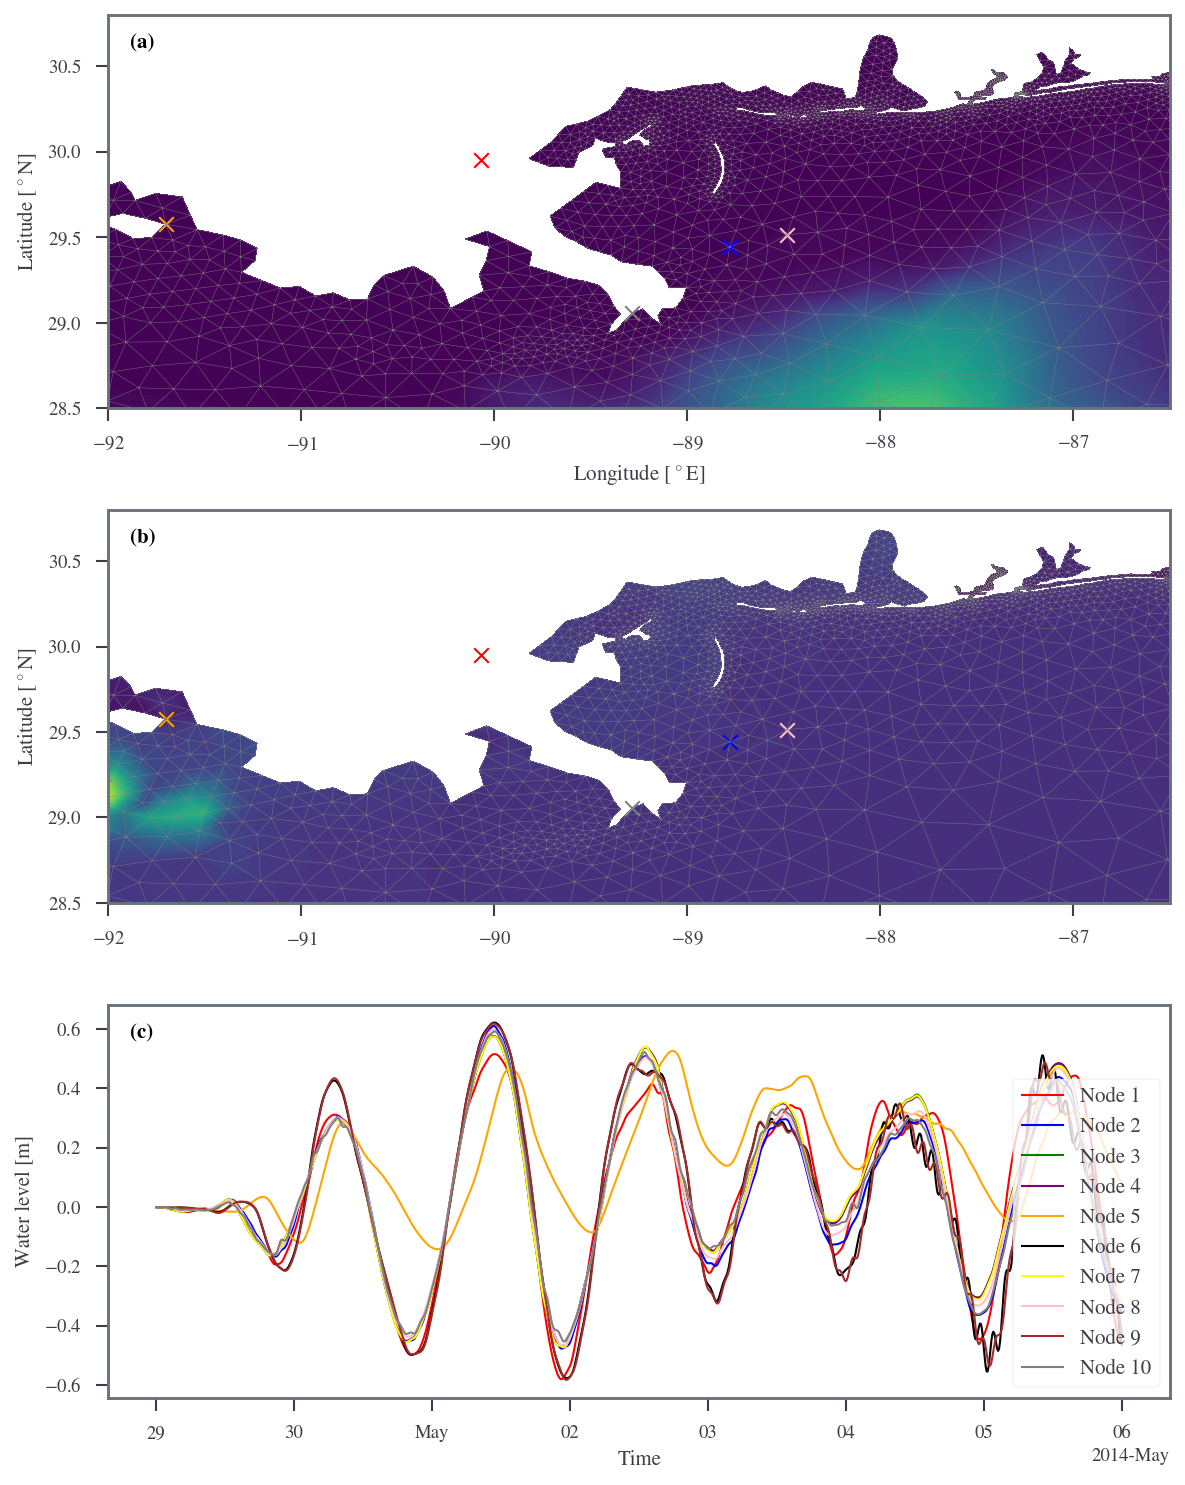

In [131]:
plot_nearby("../../NWS13example/")

'xr_loader'  3.05142 s 

'filter_mesh'  0.99195 s 

'bbox_mesh'  4.21891 s 

'xr_loader'  0.05917 s 

'filter_mesh'  0.93409 s 

'bbox_mesh'  0.99645 s 

'calculate_adjacency_matrix'  0.34871 s 

'select_coast_indices'  14.33146 s 

Central point -90.0715 29.9511
Distances [-11.50733319 -11.27224974 -11.49654911 ...  -1.34333499  -0.15167548
  -8.63674324]
'select_edge_indices'  14.48108 s 

'plot_nearby'  01 min 17 s 



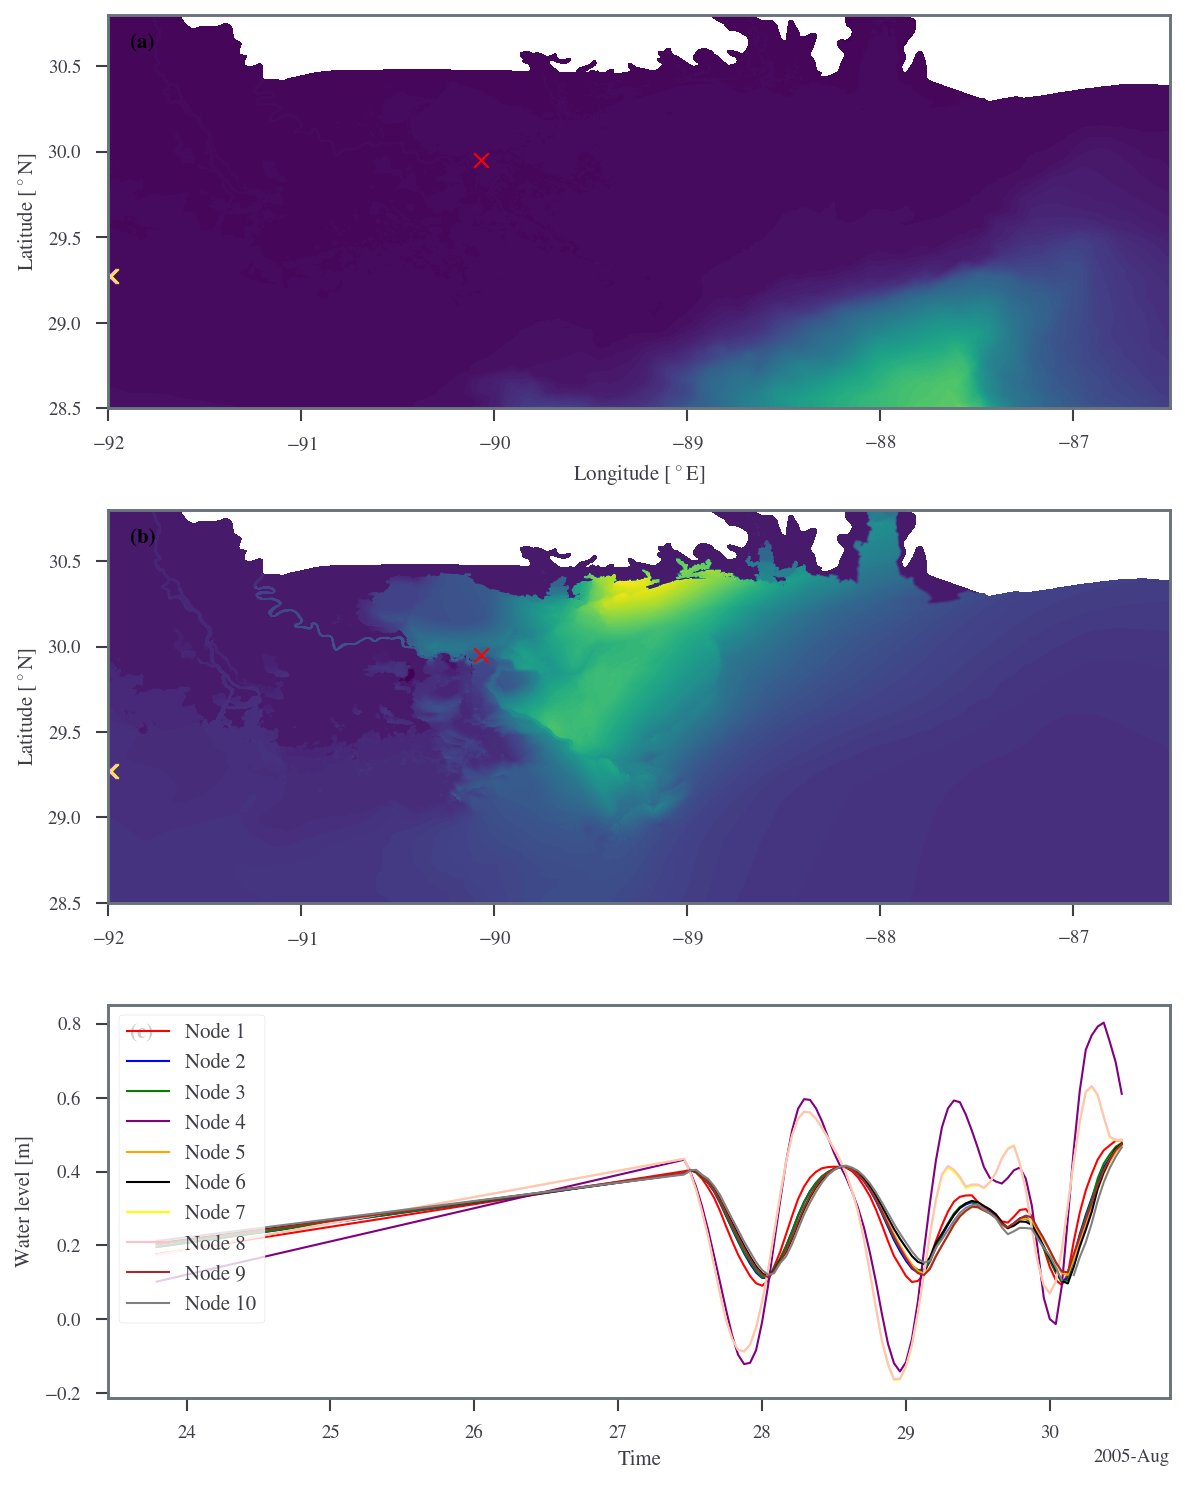

In [132]:
plot_nearby("../../kat2/", plot_mesh=False, overtopping=True)

In [133]:
set4_surround = bbox_mesh("../../NWS13set4/maxele.63.nc")
set4_surround

'xr_loader'  0.12659 s 

'filter_mesh'  0.13736 s 

'bbox_mesh'  0.27092 s 



<xarray.Dataset>
Dimensions:           (time: 1, node: 1899, mesh: 1, nope: 1, neta: 103,
                       nbou: 59, nvel: 4514, nele: 3205, nvertex: 3)
Coordinates:
  * time              (time) datetime64[ns] 2014-05-06
    x                 (node) float64 -91.45 -91.21 -91.66 ... -87.42 -87.43
    y                 (node) float64 28.61 28.63 28.61 ... 30.47 30.48 30.48
Dimensions without coordinates: node, mesh, nope, neta, nbou, nvel, nele,
                                nvertex
Data variables: (12/13)
    adcirc_mesh       (mesh) int32 ...
    nvdll             (nope) int32 ...
    max_nvdll         int32 ...
    ibtypee           (nope) int32 ...
    nbdv              (neta) int32 ...
    nvell             (nbou) int32 ...
    ...                ...
    ibtype            (nbou) int32 ...
    nbvv              (nvel) int32 ...
    depth             (node) float64 ...
    zeta_max          (node) float64 ...
    time_of_zeta_max  (node) float64 ...
    element           (nele, nvertex) int64 17 26 44 18 45 ... 1091 994 1092 993
Attributes: (12/49)
    _FillValue:         -99999.0
    model:              ADCIRC
    version:            022ef7c
    grid_type:          Triangular
    description:        ADCIRC Example     ! 32 CHARACTER ALPHANUMERIC RUN DE...
    agrid:              eastcoast_95d_ll_select.grd
    ...                 ...
    sfea0:              29.000000000000004
    cf:                 0.0
    eslm:               50.0
    cori:               0.0
    ntif:               8
    nbfr:               8

In [134]:
def get_maxele(data_folder: str = "../../NWS13set4/", bbox: BoundingBox =  NO_BBOX, point: Point = NEW_ORLEANS, number: int=10, pad: float = 2, plot_mesh: bool = True):
    return bbox_mesh(os.path.join(data_folder, "maxele.63.nc"), bbox=bbox.pad(pad))

In [135]:
k2 = get_maxele("../../kat2/")

'xr_loader'  0.04616 s 

'filter_mesh'  0.68780 s 

'bbox_mesh'  0.73888 s 



In [136]:
import numpy as np

triangles = k2.element.values -1
print(triangles.shape, type(triangles), triangles.dtype, triangles[0])
depths = k2.depth.values
print(depths.shape, type(depths))
N = len(depths)
adjacency_matrix = np.zeros((N, N), dtype=bool)
print(adjacency_matrix.shape, type(adjacency_matrix), adjacency_matrix.dtype, adjacency_matrix[0][0])
rows = np.repeat(triangles, 3, axis=0).flatten() 
print(type(rows), rows.shape)
cols = np.repeat(triangles, 3, axis=None) # .flatten()
print(type(cols), cols.shape)
adjacency_matrix[rows, cols] = True
adjacency_matrix[cols, rows] = True

(569933, 3) <class 'numpy.ndarray'> int64 [567   1   0]
(286880,) <class 'numpy.ndarray'>
(286880, 286880) <class 'numpy.ndarray'> bool False
<class 'numpy.ndarray'> (5129397,)
<class 'numpy.ndarray'> (5129397,)


In [137]:
def calculate_adjacency_matrix(triangles: np.ndarray, N: int) -> np.ndarray:
    """
    Calculate a boolean adjacency matrix for a mesh of triangles.

    Args:
        triangles (np.ndarray): Mx3 array of triangle indices.
        N (int): Number of nodes in the mesh.

    Returns:
        np.ndarray: NxN Boolean adjacency matrix.
    """
    adjacency_matrix = np.zeros((N, N), dtype=bool)
    rows = np.repeat(triangles, 3, axis=0).flatten() 
    cols = np.repeat(triangles, 3, axis=None)
    adjacency_matrix[rows, cols] = True
    adjacency_matrix[cols, rows] = True
    return adjacency_matrix

In [138]:
from adforce.mesh import select_coast, bbox_mesh, select_coast
hres_ds = bbox_mesh("../../kat2/fort.63.nc")

'xr_loader'  0.01629 s 

'filter_mesh'  1.55492 s 

'bbox_mesh'  1.59241 s 



In [139]:
from adforce.mesh import select_coast_indices
indices, adj = select_coast_indices(hres_ds, overtopping=True)

'calculate_adjacency_matrix'  0.40403 s 

'select_coast_indices'  14.07521 s 



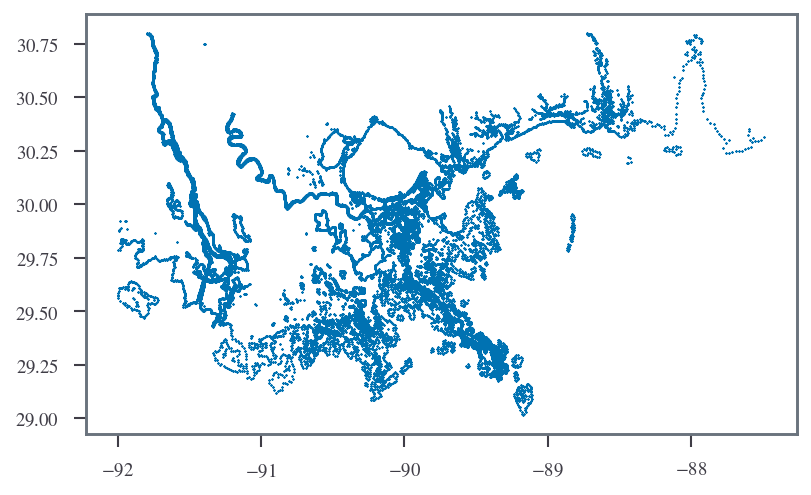

In [140]:
cch = hres_ds.isel(node=indices)
import matplotlib.pyplot as plt
plt.scatter(cch.x.values, cch.y.values, marker="x", s=0.5)

In [141]:
from adforce.mesh import select_coast, bbox_mesh, select_coast
hres_ds = bbox_mesh("../../kat2/fort.63.nc")
coast_ds = select_coast(hres_ds, overtopping=True)

'xr_loader'  0.01748 s 

'filter_mesh'  0.97180 s 

'bbox_mesh'  0.99280 s 

'calculate_adjacency_matrix'  0.22521 s 

'select_coast_indices'  8.73718 s 

'select_coast'  8.74053 s 



In [142]:
coast_ds

<xarray.Dataset>
Dimensions:      (time: 75, node: 17883, mesh: 1, nope: 2, neta: 122, nbou: 15,
                  nvel: 8316, node1: 17883, node2: 17883)
Coordinates:
  * time         (time) datetime64[ns] 2005-08-23T19:00:00 ... 2005-08-30T12:...
    x            (node) float64 -90.9 -90.89 -90.91 ... -89.2 -89.02 -89.81
    y            (node) float64 29.12 29.13 29.13 29.16 ... 30.41 30.45 30.24
Dimensions without coordinates: node, mesh, nope, neta, nbou, nvel, node1, node2
Data variables:
    adcirc_mesh  (mesh) int32 ...
    nvdll        (nope) int32 ...
    max_nvdll    int32 ...
    ibtypee      (nope) int32 ...
    nbdv         (neta) int32 ...
    nvell        (nbou) int32 ...
    max_nvell    int32 ...
    ibtype       (nbou) int32 ...
    nbvv         (nvel) int32 ...
    depth        (node) float64 1.76 1.7 1.658 0.01583 ... 0.374 0.3281 0.02433
    zeta         (time, node) float64 ...
    adj          (node1, node2) bool True True True False ... False False True
Attributes: (12/49)
    _FillValue:         -99999.0
    model:              ADCIRC
    version:            022ef7c
    grid_type:          Triangular
    description:        ASGS cs:20050724180000 cy:KATRINA31 ASGS       ! 32 C...
    agrid:              grid
    ...                 ...
    sfea0:              29.000000000000004
    cf:                 0.0
    eslm:               50.0
    cori:               0.0
    ntif:               8
    nbfr:               8

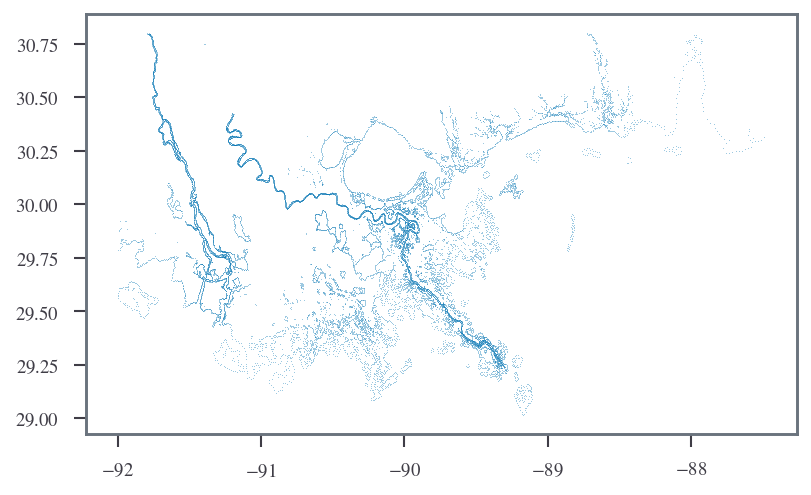

In [143]:
plt.scatter(coast_ds.x, coast_ds.y, s=0.01)

In [144]:
coast_ds.adj

<xarray.DataArray 'adj' (node1: 17883, node2: 17883)>
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       [ True, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True]])
Dimensions without coordinates: node1, node2

In [145]:
import networkx as nx

A = coast_ds.adj.values
X = coast_ds.x.values
Y = coast_ds.y.values

# Create a graph from the adjacency matrix
G = nx.from_numpy_array(A)

# Add the geographic coordinates to each node as attributes
for i, (x, y) in enumerate(zip(X, Y)):
    G.nodes[i]['pos'] = (x, y)

# Get positions from node attributes for plotting
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph
nx.draw(G, pos, with_labels=False, node_color='skyblue', node_size=0.1, edge_color='k')

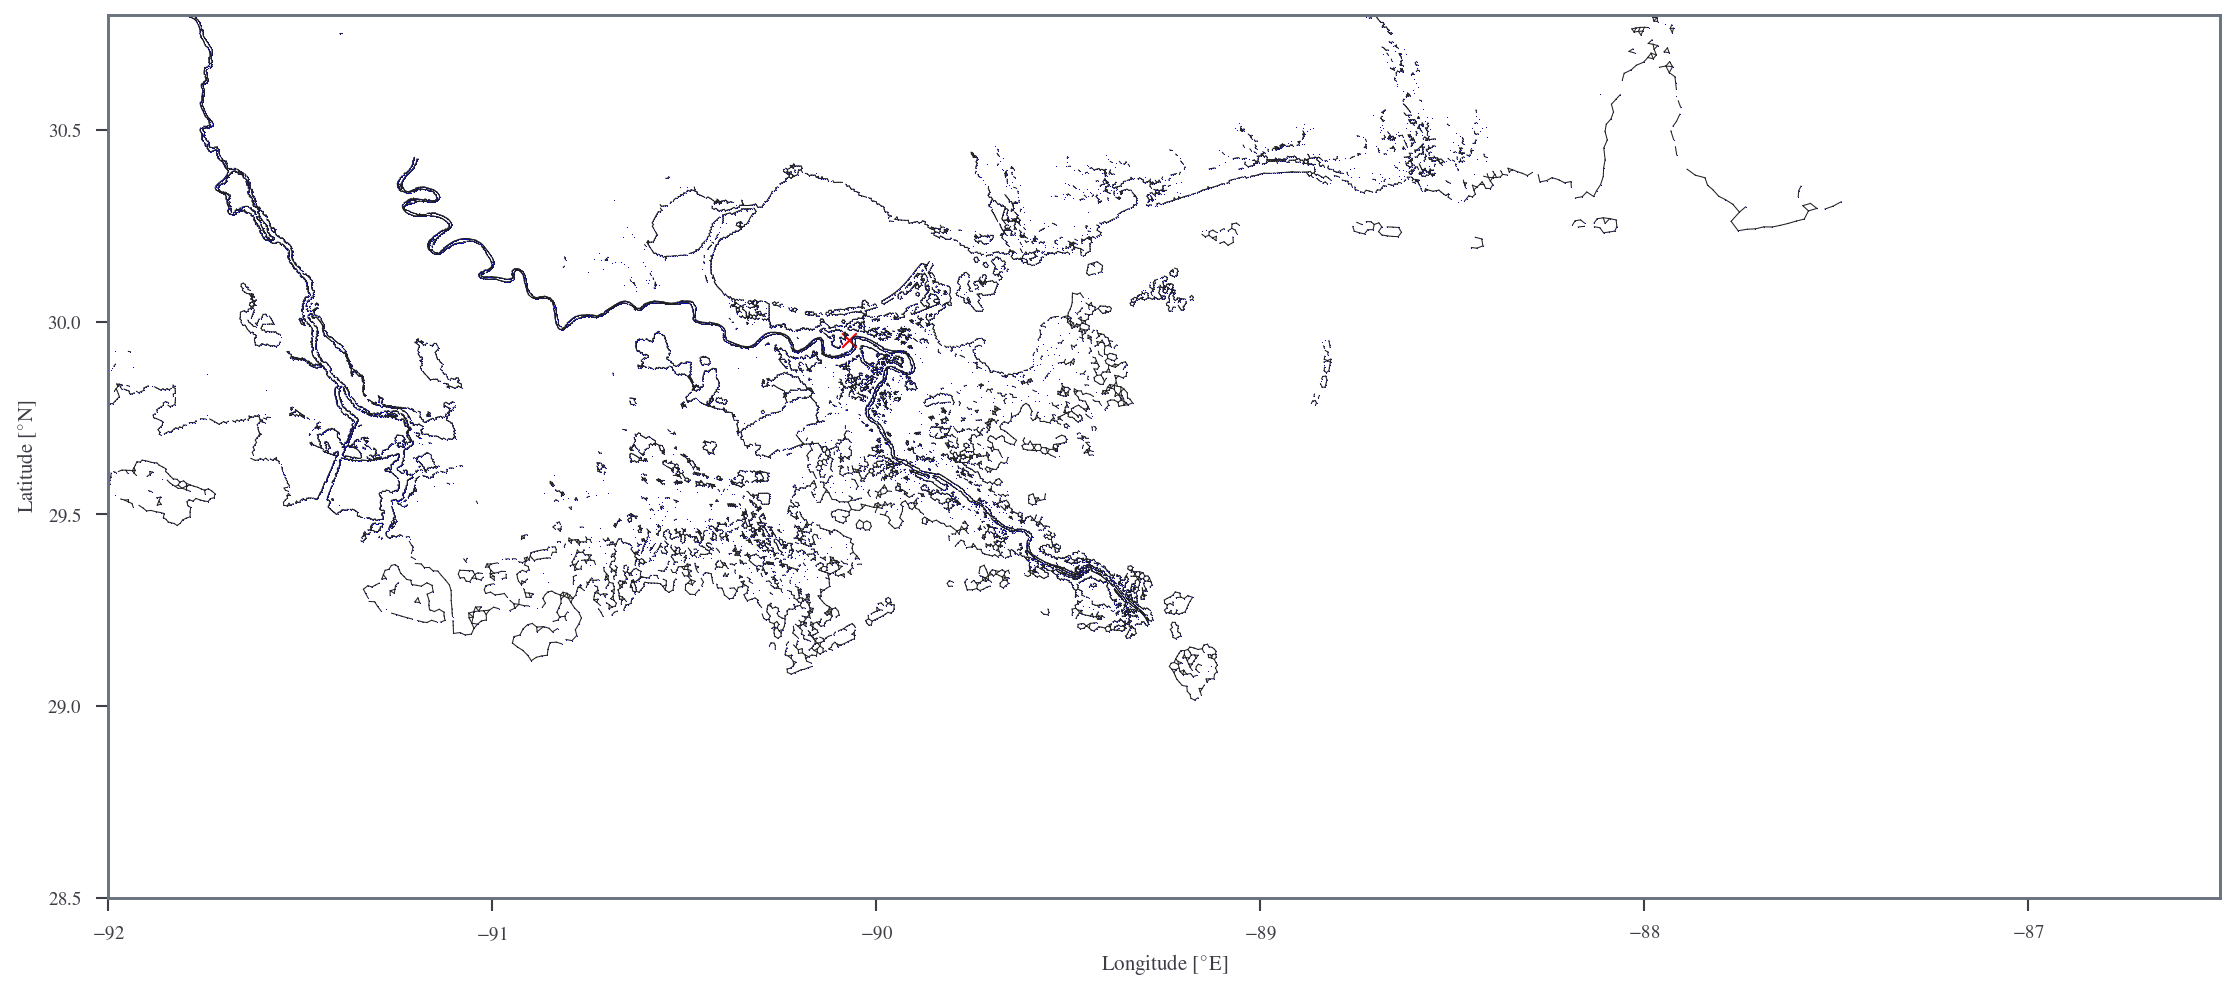

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15, 15))
# Plot edges manually to control their appearance better
for i, j in G.edges():
    ax.plot([X[i], X[j]], [Y[i], Y[j]], 'k-', linewidth=0.5)  # Plot each edge with a thin line

# Optionally, plot the nodes with very small size if needed
ax.scatter(X, Y, s=0.1, color="blue")  # Very small node size

# Adjust the plot
ax.set_aspect('equal')  # Set aspect ratio to equal if geographic data
# plt.axis('off')  # Turn off axis for a cleaner look
plt.scatter(NEW_ORLEANS.lon, NEW_ORLEANS.lat, marker="x", c="red")
NO_BBOX.ax_lim(ax)
plt.ylabel("Latitude [$^{\circ}$N]")
plt.xlabel("Longitude [$^{\circ}$E]")
plt.show()